<a href="https://colab.research.google.com/github/Shavkatshoniyozov/Data_Science/blob/main/ticket_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV 

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score 
from sklearn import tree

from sklearn import metrics

In [135]:
#uploading files
test = pd.read_csv('/content/test_data.csv')
train = pd.read_csv("/content/train_data.csv")
test.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,1,Air_India,AI-765,Kolkata,Evening,one,Night,Delhi,Business,28.25,2
1,2,Vistara,UK-747,Delhi,Early_Morning,one,Night,Mumbai,Business,13.83,34
2,3,Air_India,AI-570,Mumbai,Early_Morning,zero,Early_Morning,Chennai,Business,2.00,30
3,4,AirAsia,I5-974,Hyderabad,Night,one,Late_Night,Delhi,Economy,5.17,26
4,5,Air_India,AI-770,Kolkata,Night,one,Afternoon,Mumbai,Economy,16.33,35


In [136]:
train.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


In [137]:
#checking dataset for missing values
#test.isnull().sum()
train.isnull().sum()

id                  0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [138]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                20000 non-null  int64  
 1   airline           20000 non-null  object 
 2   flight            20000 non-null  object 
 3   source_city       20000 non-null  object 
 4   departure_time    20000 non-null  object 
 5   stops             20000 non-null  object 
 6   arrival_time      20000 non-null  object 
 7   destination_city  20000 non-null  object 
 8   class             20000 non-null  object 
 9   duration          20000 non-null  float64
 10  days_left         20000 non-null  int64  
 11  price             20000 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 1.8+ MB


In [139]:
train.corrwith(train['price']).abs().sort_values(ascending=False)

price        1.000000
duration     0.213158
days_left    0.102545
id           0.002443
dtype: float64

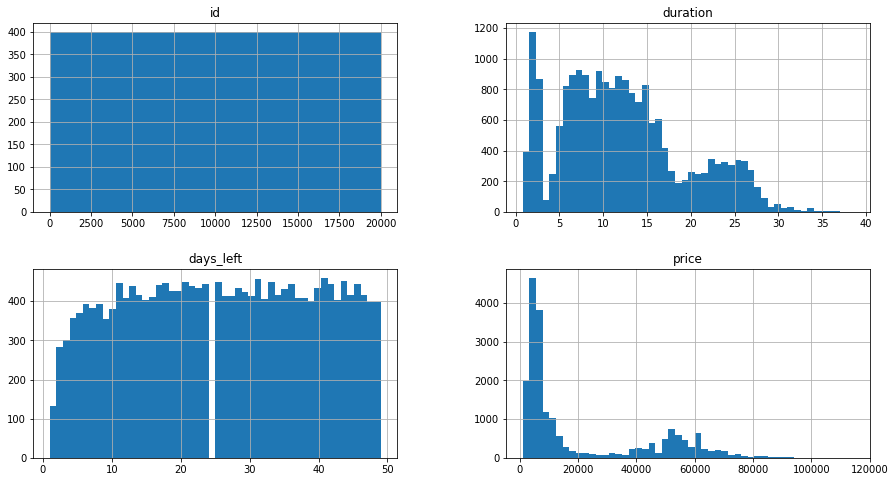

In [140]:
%matplotlib inline
train.hist(bins=50, figsize=(15,8))
plt.show()

In [141]:
train.shape, test.shape

((20000, 12), (5000, 11))

Text(0.5, 1.0, 'Number of days left to flight')

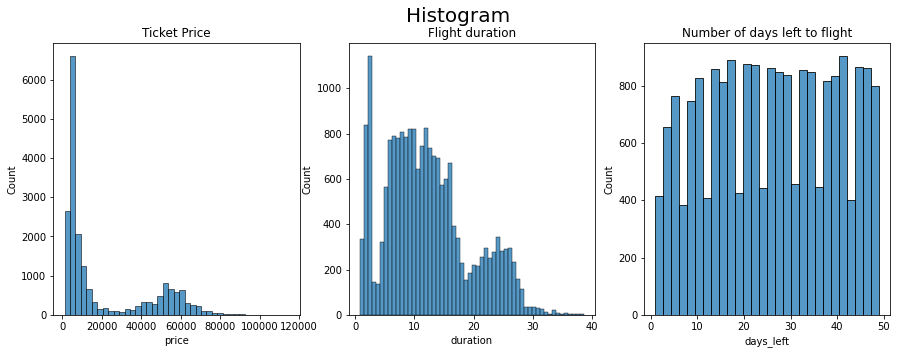

In [142]:
#Numerical data
fig, axes = plt.subplots(1,3, figsize=(15,5))
fig.suptitle('Histogram', size=20)

sns.histplot(data=train, x='price', ax=axes[0])
axes[0].set_title('Ticket Price', size=12)

sns.histplot(data=train, x='duration', ax=axes[1])
axes[1].set_title('Flight duration')

sns.histplot(data=train, x='days_left', ax=axes[2])
axes[2].set_title('Number of days left to flight')

[Text(0, 0.5, ''), Text(0.5, 0, ''), Text(0.5, 1.0, 'Departure city')]

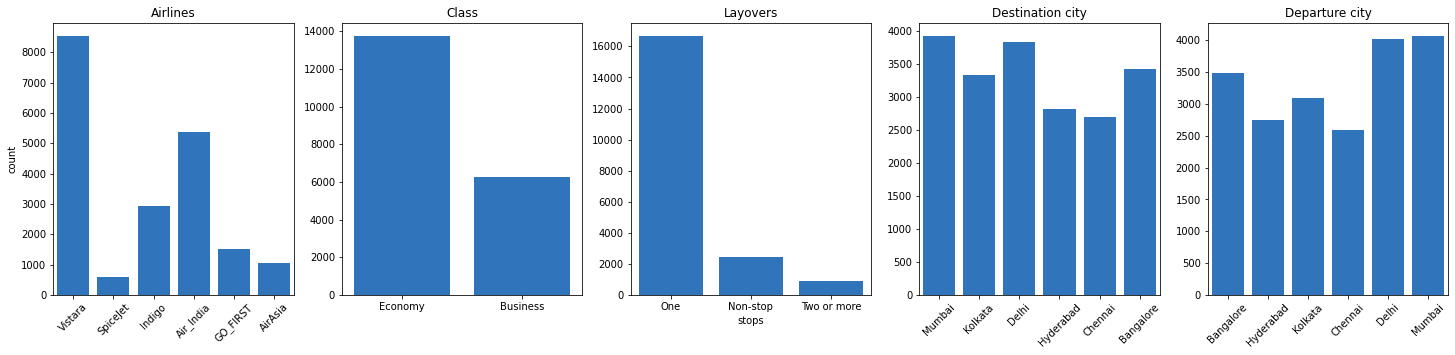

In [143]:
#Categorical data
fig, axes = plt.subplots(1,5, figsize = (25,5))

sns.countplot(ax=axes[0], data=train, x='airline', palette=['#1974D2'])
axes[0].tick_params(axis='x', rotation=45)
axes[0].set(xlabel=None, title='Airlines')

sns.countplot(ax=axes[1], data=train, x='class',  palette=(['#1974D2']))
axes[1].set_title('Class', size=14)
axes[1].set(ylabel=None, title='Class', xlabel=None)

sns.countplot(ax=axes[2], data=train, x='stops', palette=(['#1974D2']))
axes[2].set_xticklabels(['One', 'Non-stop', 'Two or more'])
axes[2].set(ylabel=None, title='Layovers')

sns.countplot(ax=axes[3], data=train, x='destination_city', palette=(['#1974D2']))
axes[3].tick_params(axis='x', rotation=45)
axes[3].set(xlabel=None, ylabel=None, title='Destination city')

sns.countplot(ax=axes[4], data=train, x='source_city', palette=(['#1974D2']))
axes[4].tick_params(axis='x', rotation=45)
axes[4].set(xlabel=None, ylabel=None, title='Departure city')

# **Preparing datasets for ML**

**Label Encoder**

In [144]:
le = LabelEncoder
train.columns

Index(['id', 'airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [145]:
#Since 'id' and 'flight' (flight number) are not relevent for our model
train.drop('id', axis=1, inplace=True)
train.drop('flight', axis=1, inplace=True)

test_id = test[['id']]
test.drop('id', axis=1, inplace=True)
test.drop('flight', axis=1, inplace=True)

In [146]:
cols = ['airline', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class']

train1 = train[cols].apply(le().fit_transform)
test1 = test[cols].apply(le().fit_transform)

train.drop(cols, axis=1, inplace=True)
test.drop(cols, axis=1, inplace=True)

In [147]:
train = pd.concat([train1, train], axis=1)
train.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,5,0,1,0,5,5,1,14.25,21,7212
1,4,3,2,2,5,4,1,1.75,7,5292
2,5,0,4,0,2,2,0,9.58,5,60553
3,5,4,4,0,2,3,1,6.75,28,5760
4,3,1,1,2,4,5,1,2.00,4,10712


In [148]:
test = pd.concat([test1, test], axis=1)
test.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,1,4,2,0,5,2,0,28.25,2
1,5,2,1,0,5,5,0,13.83,34
2,1,5,1,2,1,1,0,2.00,30
3,0,3,5,0,3,2,1,5.17,26
4,1,4,5,0,0,5,1,16.33,35


In [149]:
train.corrwith(train['price']).abs().sort_values(ascending=False)

price               1.000000
class               0.937868
airline             0.241193
duration            0.213158
stops               0.201309
days_left           0.102545
departure_time      0.058520
arrival_time        0.046801
source_city         0.013570
destination_city    0.008747
dtype: float64

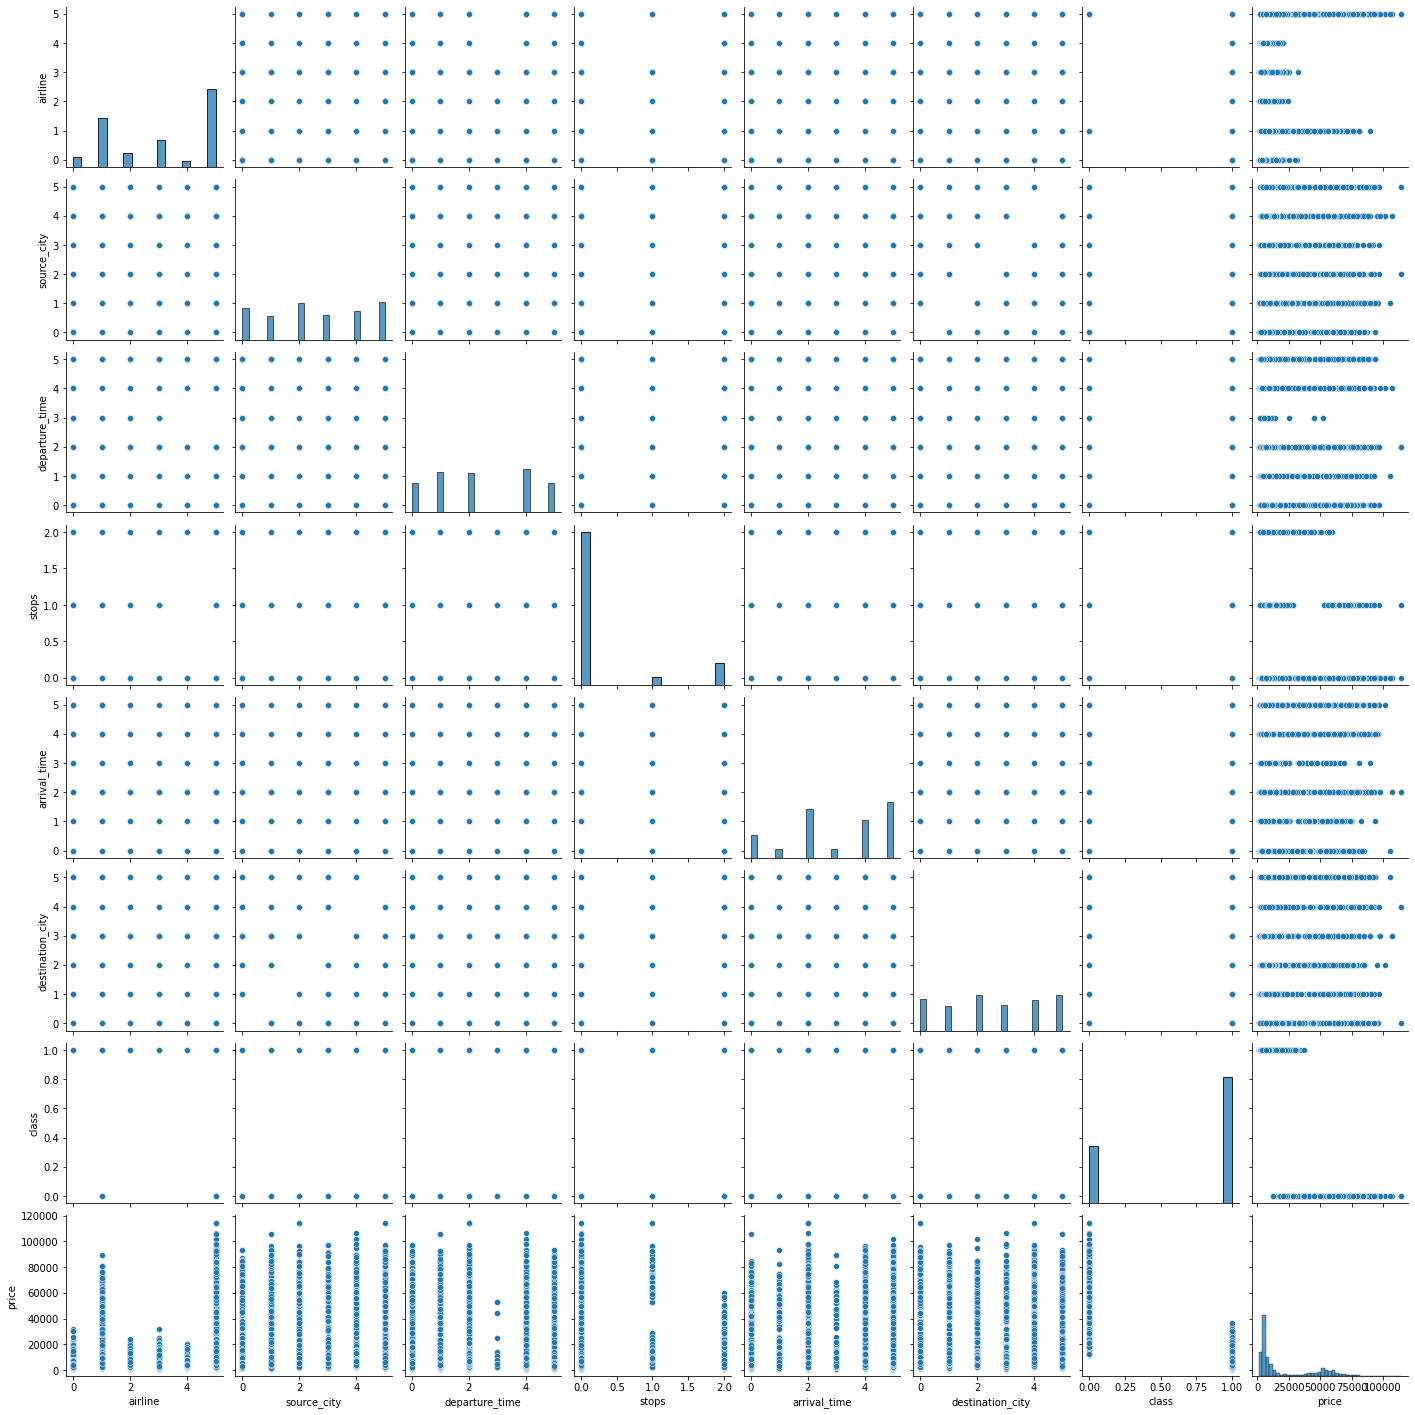

In [150]:
%matplotlib inline
sns.pairplot(train[['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'price']])
plt.show()

**Label Encoding with "get_dummies"**

In [151]:
#train.drop('flight', axis=1, inplace=True)

In [152]:
#encoded = pd.get_dummies(train)
#encoded.head()

**Normalizing datasets**

In [153]:
scaler = StandardScaler()

In [154]:
x_train = train.drop('price', axis=1).values
y_train = train['price']

x_test = test.values

In [155]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test) 

**Prediction ML models**

In [156]:
#Linear Regression

linreg = LinearRegression()
linreg.fit(x_train, y_train)
y_pred = linreg.predict(x_test)
linreg_acc = round(linreg.score(x_train, y_train) * 100, 2)
linreg_acc

90.58

In [157]:
#Decision Tree

tree_model = DecisionTreeClassifier()
tree_model.fit(x_train, y_train)
y_pred = tree_model.predict(x_test)
tree_model_acc = round(tree_model.score(x_train, y_train) * 100, 2)
tree_model_acc

99.88

In [166]:
#knn

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
knn_acc = round(knn.score(x_train, y_train) * 100, 2)
knn_acc

99.88

In [159]:
#param_grid = {'n_neighbors' : np.arange(1,10)}
#k_value = GridSearchCV(knn, param_grid, cv=5)
#k_value.fit(x_train ,y_train)
#k_value.best_estimator_

In [167]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'KNN'],
    'Accuracy': [linreg_acc, tree_model_acc, knn_acc]})
models

,Model,Accuracy
0,Linear Regression,90.58
1,Decision Tree,99.88
2,KNN,99.88


In [168]:
# decision tree model selected for the prediction
submit = pd.DataFrame({
    'id': test_id['id'],
    'price' : y_pred})

In [169]:
submit.head()

,id,price
0,1,49884
1,2,51384
2,3,23484
3,4,3201
4,5,6190


In [164]:
submit.head()

,id,price
0,1,53743
1,2,51384
2,3,23484
3,4,2228
4,5,5102


In [170]:
submit.to_csv('ticket_price_submission.csv', index=False)